In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import pandas as pd

%matplotlib inline

In [2]:
dir='/work/teletravaille/try/'
file_2='diff_local.cdf'

In [3]:

diff=xr.open_dataset(dir+file_2)

In [4]:
lat=diff.latxy
lon=diff.lonxy

In [5]:
SSH_global_mean=global_mean.SSH
SST_global_mean=global_mean.SST
SSS_global_mean=global_mean.SSS
U_global=global_mean.U
V_global=global_mean.V

NameError: name 'global_mean' is not defined

In [6]:
SSH_global_truth=diff.SSH
SST_global_truth=diff.SST
SSS_global_truth=diff.SSS
U_global_truth=diff.U
V_global_truth=diff.V

In [7]:
SSH_global_mean=SSH_global_mean.squeeze()
SST_global_mean=SST_global_mean.squeeze()
SSS_global_mean=SSS_global_mean.squeeze()
U_global_mean=U_global.squeeze()
V_global_mean=V_global.squeeze()

NameError: name 'SSH_global_mean' is not defined

In [8]:
SSH_global_truth=SSH_global_truth.squeeze()
SST_global_truth=SST_global_truth.squeeze()
SSS_global_truth=SSS_global_truth.squeeze()
U_global_truth=U_global_truth.squeeze()
V_global_truth=V_global_truth.squeeze()

## Global Mean 

## U,V Vectors Plot

C:\Users\HP\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
C:\Users\HP\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


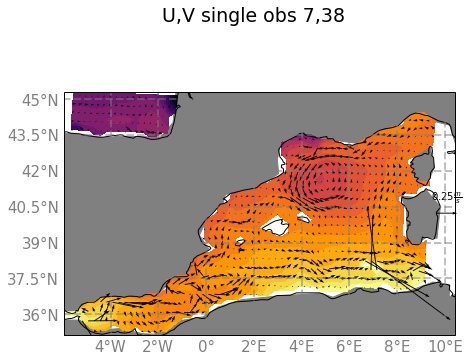

In [19]:
levels_U = np.linspace(-0.2, 0.4, 25)
levels_V = np.linspace(-0.5, 0.2, 25)
levels_SST = np.linspace(10.1, 17.7, 25)


fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
cmap = plt.get_cmap('inferno')
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines(resolution='50m')
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
pcolor = ax.contourf(lon,lat, SST_global_mean, levels=levels_SST, transform=ccrs.PlateCarree(),cmap=cmap)


Q =ax.quiver( lon[::2].values, lat[::2].values, U_global_mean[::2].values,V_global_mean[::2].values,transform=ccrs.PlateCarree(), scale=None,scale_units='inches')
Q._init()
assert isinstance(Q.scale, float)
ax.quiverkey(Q, 0.98, 0.5, 0.25, r'$0.25 \frac{m}{s}$')
plt.suptitle('U,V single obs 7,38' ,size=19)
plt.savefig('U,V single obs 7,38')


plt.show()

## Difference

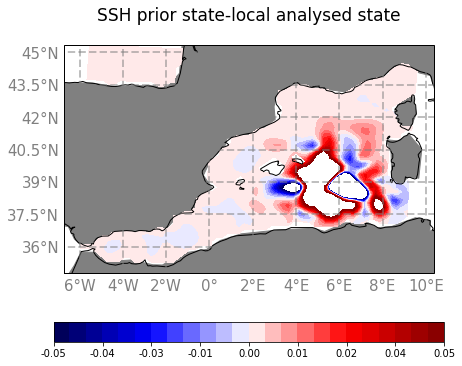

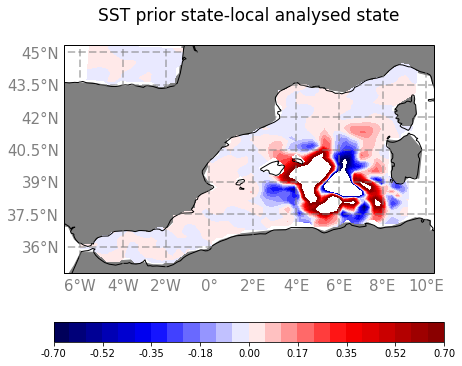

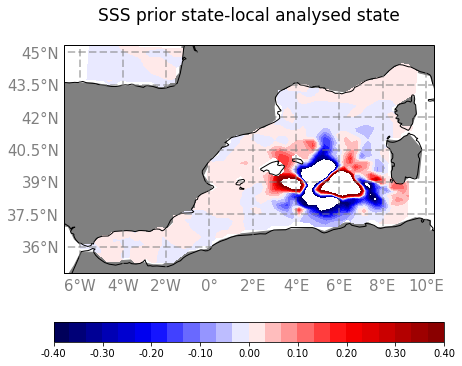

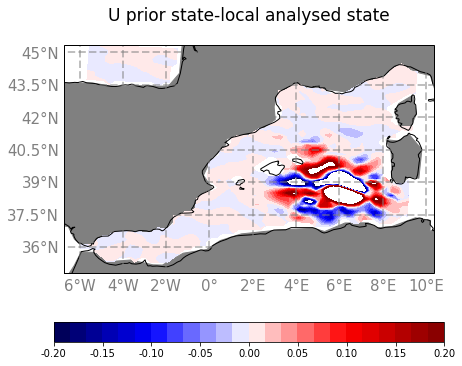

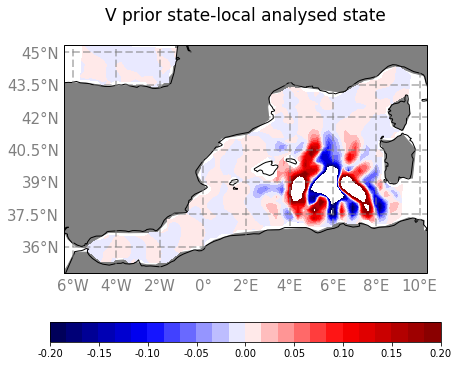

In [9]:
levels_SSH = np.linspace(-0.05, 0.05, 25)
levels_SST = np.linspace(-0.7, 0.7, 25)
levels_SSS = np.linspace(-0.4, 0.4, 25)
levels_U = np.linspace(-0.2, 0.2, 25)
levels_V = np.linspace(-0.2, 0.2, 25)

#cmap = [plt.get_cmap('seismic'),plt.get_cmap('seismic'), plt.get_cmap('seismic'), plt.get_cmap('seismic'), plt.get_cmap('seismic')]
cmap = plt.get_cmap('seismic')

var = [SSH_global_truth, SST_global_truth, SSS_global_truth, U_global_truth, V_global_truth]
levels = [levels_SSH, levels_SST, levels_SSS, levels_U, levels_V]
title = ['SSH prior state-local analysed state', 'SST prior state-local analysed state', 'SSS prior state-local analysed state', 'U prior state-local analysed state', 'V prior state-local analysed state']

for ii in [0,1,2,3,4]:
    fig = plt.figure(figsize=(7,6))
    ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
    pcolor = ax1.contourf(lon,lat,var[ii], levels=levels[ii], transform=ccrs.PlateCarree(),cmap=cmap)
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=1, format='%0.02f') 
    ax1.set_title(title[ii] ,size=17,y=1.08)

    ax1.add_feature(cfeature.LAND,facecolor='grey')
    ax1.coastlines(resolution='50m')
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.ylabel_style = {'size': 15, 'color': 'gray'}
#    plt.savefig('/C/work/teletravaille/UV_0.01/'+title[ii])
#    plt.savefig(title[ii])


#plt.suptitle('Local Mean' ,size=19)
#plt.show(SSH_global_mean)